In [163]:

with open('group.json', 'r') as f:
    data = f.read()
objs = json.loads(data)
feature_types = objs['hits']['hits'][0]['_source']['modelConfigs']['L6COLL_daily']['featureTypes']
id2name = {}
featureId2Idx = {}
numeric_feature = []
categorical_feature = []
i = 0
for f in feature_types:
    if f['type'] == 'NUMERICAL':
        numeric_feature += f['featureIds']
        featureId2Idx[f['featureIds'][0]] = i
        i += 1
    else:
        categorical_feature += f['featureIds']
        for id in f['featureIds']:
            featureId2Idx[id] = i
        i+=1
    for id in f['featureIds']:
        id2name[id] = f['name']


In [67]:
import json
import os
import matplotlib.pyplot as plt

def show(filename):
    with open(filename, 'r') as f:
        data = f.read()
    objs = json.loads(data)
    p_value = []
    p_value_KS = []
    p_value_chiSquare = []
    category_feature_ids = []
    zero_P_category_ids = []
    zero_P_numeric_ids = []
    for obj in objs:
        p_value.append(obj['probability'])
        if obj['test'] == 'KS':
            p_value_KS.append(obj['probability'])
            if obj['probability'] < 1e-5:
                zero_P_numeric_ids.append(obj['featureIds'][0])
                
        else:
            p_value_chiSquare.append(obj['probability'])
            category_feature_ids.append([min(obj['featureIds']), max(obj['featureIds'])])
            if obj['probability'] < 1e-5:
                zero_P_category_ids.append([min(obj['featureIds']), max(obj['featureIds'])])
                
    print(category_feature_ids)
    print("zero P category ids: ", zero_P_category_ids)
    print("zero P numeric ids: ", zero_P_numeric_ids)
    
    fig, axes = plt.subplots(2, 2)
    axes[0, 0].plot(p_value, 'r')
    axes[0, 0].set_title("all_feature_Pvalue")
    axes[0, 1].plot(p_value_KS, 'g', marker='*')
    axes[0, 1].set_title("KS_feature_Pvalue")
    axes[1, 0].plot(p_value_chiSquare, 'b', marker='*')
    axes[1, 0].set_xlim((0, len(p_value_chiSquare) - 1))
    axes[1, 0].set_title("Chisquare_feature_Pvalue")
    fig.suptitle(filename.strip('.json'))
    plt.show()
    

[[1, 19], [20, 254], [255, 256], [259, 263], [271, 280], [281, 286], [287, 294], [295, 301], [305, 327], [328, 337], [338, 431], [453, 461]]
zero P category ids:  [[1, 19], [20, 254], [281, 286], [305, 327], [328, 337], [338, 431], [453, 461]]
zero P numeric ids:  [0, 257, 264, 265, 269, 270, 302, 432, 434, 436, 437, 438, 439, 440, 441, 442, 443, 444, 446, 447, 448, 449, 451, 452, 468, 485, 486, 487, 488, 489, 490]


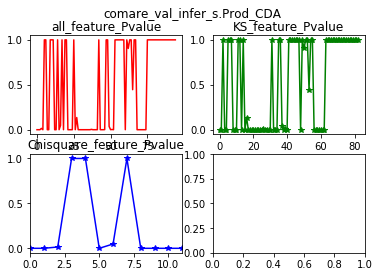

In [68]:
filename = 'comare_val_infer_s.Prod_CDA.json'
show(filename)
# dk1:prod_name, dk2:prod_subtype, dk3:security_in, dk6:prod_type_account,
# dk14:block_cd, dk15:cmt_blk_cd, dk16:sec_cd, dk17:max_dlq_status_cd
# dk21:prov_cd, dk22:div_cd, dk23:sic_cd, dk45:hrisk_ab_in
# x = [_ for _ in range(len(p_value))]
# plt.scatter(x, p_value)
# plt.show()

[[1, 19], [20, 254], [255, 256], [259, 263], [271, 280], [281, 286], [287, 294], [295, 301], [305, 327], [328, 337], [338, 431], [453, 461]]
zero P category ids:  [[305, 327], [328, 337], [338, 431], [453, 461]]
zero P numeric ids:  [0, 257, 264, 265, 302, 434, 437, 438, 439, 441, 444, 446, 447, 448, 449, 451, 468, 485, 487, 488, 489, 490]


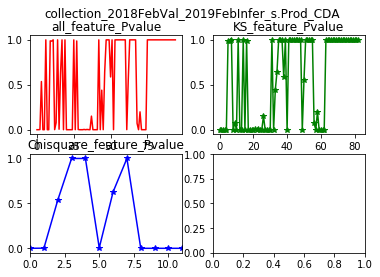

In [70]:
filename = 'collection_2018FebVal_2019FebInfer_s.Prod_CDA.json'
show(filename)

[[1, 19], [20, 254], [255, 256], [259, 263], [271, 280], [281, 286], [287, 294], [295, 301], [305, 327], [328, 337], [338, 431], [453, 461]]
zero P category ids:  [[1, 19], [20, 254], [281, 286], [305, 327], [328, 337], [338, 431], [453, 461]]
zero P numeric ids:  [0, 257, 258, 264, 265, 269, 270, 302, 304, 434, 436, 437, 438, 439, 440, 441, 442, 443, 444, 446, 447, 448, 449, 451, 462, 465, 466, 467, 468, 476, 477, 480, 481, 486, 487, 489, 490]


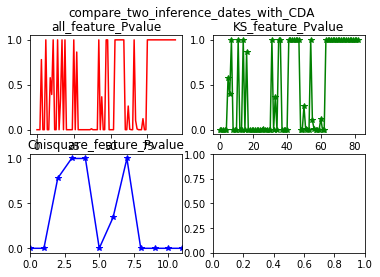

In [71]:
filename = 'compare_two_inference_dates_with_CDA.json'# same time around the year
show(filename)

[[1, 19], [20, 254], [255, 256], [259, 263], [271, 280], [281, 286], [287, 294], [295, 301], [305, 327], [328, 337], [338, 431], [453, 461]]
zero P category ids:  [[1, 19], [20, 254]]
zero P numeric ids:  [0, 257, 264, 265, 302, 444]


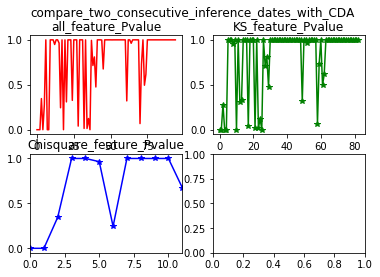

In [72]:
filename = 'compare_two_consecutive_inference_dates_with_CDA.json' # 1.6, 1.8
show(filename)

In [75]:
import os
print(os.path.abspath('.'))

/opt/ml/mount


In [169]:
import math
import numpy as np
def show2(filename):
    numericFeatureSet = set(numeric_feature)
    with open(filename, 'r') as f:
        data = f.read()
    objs = json.loads(data)
    num_plot = len(objs.keys())
    seg_feature_ids = sorted(list(objs.keys()))
    fig, axes = plt.subplots(4, 2)
    features = [_ for _ in range(len(objs[seg_feature_ids[0]]["pValue"]))]
    axes[0, 0].scatter(features, objs["-1"]["pValue"])
    axes[0, 0].set_title("f.{0}, avgP:{1}".format("all", round(np.average(objs["-1"]["pValue"]), 3)))
    numeric_feature_idxes = [featureId2Idx[i] for i in range(len(numeric_feature))]
    axes[0, 1].scatter([_ for _ in range(len(numeric_feature_idxes))], [objs["-1"]["pValue"][i] for i in numeric_feature_idxes])
    axes[0, 1].set_title("f.{0}, avgP:{1}".format("numeric", round(np.average([objs["-1"]["pValue"][i] for i in numeric_feature_idxes]), 3)))

    for i in range(1, len(seg_feature_ids)):
        feature_id = seg_feature_ids[i]
        x = round((i -1) / 2) + 1
        y = (i - 1) % (2)
        avg = round(np.average(objs[feature_id]["pValue"]), 3)
        zero_features = sum([1 for p in objs[feature_id]["pValue"] if p < 1e-6])
        #zero_numeric_features = [i for i in range(len(objs[feature_id]["pValue"])) if p < 1e-6]]
        axes[x, y].scatter(features, objs[feature_id]["pValue"])
        axes[x, y].set_title("f.{0}, avgP:{1}".format(feature_id, avg))
    fig.suptitle(filename.strip('.json'))
    plt.show()

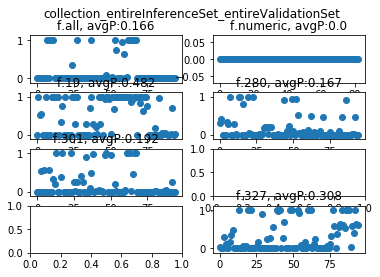

In [170]:
show2('collection_entireInferenceSet_entireValidationSet.json')

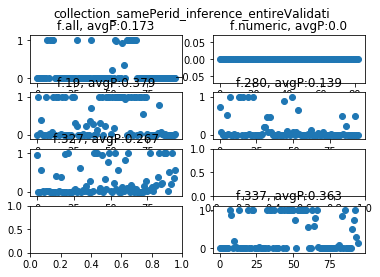

In [171]:
show2('collection_samePerid_inference_entireValidation.json') # one quarter

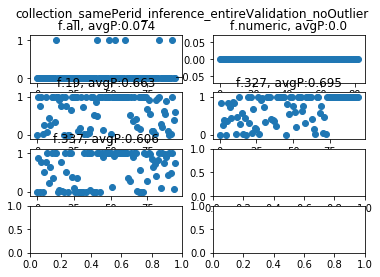

In [172]:
show2('collection_samePerid_inference_entireValidation_noOutlier.json')

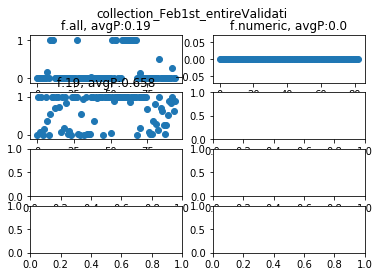

In [173]:
show2('collection_Feb1st_entireValidation.json')

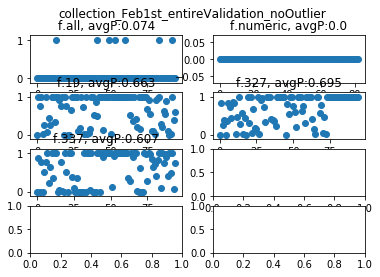

In [174]:
show2('collection_Feb1st_entireValidation_noOutlier.json')

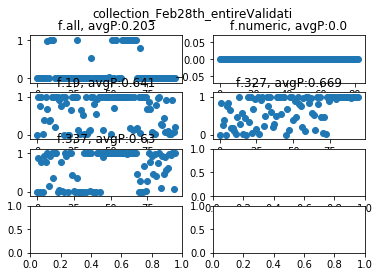

In [175]:
show2('collection_Feb28th_entireValidation.json')